In [347]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import prot.viz
import prot.size as size
colors, palette = prot.viz.bokeh_theme()
dataset_colors = {'li_2014':colors['purple'], 'schmidt_2016':colors['light_blue'],
                   'peebo_2015':colors['green'], 'valgepea_2013':colors['red']}
prot.viz.plotting_style()

colors, palette = prot.viz.bokeh_theme()

color_dict = dict(zip(np.append(dai_Cm_df.condition.unique(), dai_nut_df.condition.unique()), palette))

In [3]:
def compute_elongation_rate(r_aa, R, Kd=5E-3, V=1E-15, t=1, Na=6.022E23, fa=1, rt_max=17.1):
    """
    Computes the physically meaningful root for the elongation rate.
    """
    a = -R * fa * t
    b = r_aa * t + rt_max * R * fa * t + Kd * V * Na
    c = -rt_max * r_aa * t
    numer = -b + np.sqrt(b**2 - 4 * a *c)
    return numer / (2 * a)

def compute_growth_rate(r_t, Naa, R, fa=1):
    """
    Given an elongation rate, compute the growth rate.
    """
    return 3600 * r_t * R * fa * Naa**-1

In [130]:
# Kd=5E-3

Kd = 15*((rt_max/ 11.5 ) - 1)*1E-1 #mM
Kd = Kd*1E-3 #M

In [210]:
Kd 

0.0007304347826086959

## Wild-type data

Let's try to first recover the expected trend in elongation rates across the wild-type growth conditions. I think it would be nice to try to plot elongation rate versus growth rate, and elongation rate versus ribosome fraction. 

In [396]:
# nutrient limitation; SI data from Dai et al. 2016

conditions = ['RDM + 0.2% glucose+10 mM NH4Cl',
            '0. 2 % glucose+cAA+10 mM NH4Cl',
           ' 10 mM glucose-6-phosphate+10 mM gluconate +10 mM NH4Cl',
            '0.2% glucose+10 mM NH4Cl',
            '0.2% xylose+10 mM NH4Cl',
            '0.2 % glycerol+10 mM NH4Cl',
            '0.2% fructose+10 mM NH4Cl',
            '0.2% sorbitol+10 mM NH4Cl',
            '0.2% galactose+10 mM NH4Cl',
            '60 mM acetate+10 mM NH4Cl',
            '0.2% mannose+10 mM NH4Cl',
            '0.1% mannose+10 mM NH4Cl',
            '20 mM potassium aspartate',
            '0.075% mannose+10 mM NH4Cl',
            '20 mM aspartate+10 mM NH4Cl',
            '0.2% glycerol +10 mM Arginine',
            '20 mM glutamate+10 mM NH4Cl',
            '0.2% glycerol+20 mM Threonine']

erate = [16.7,
         16.3,
         16.1,
         15.9,
         14.9,
         15.0,
         14.7,
         13.7,
         13.1,
         12.6,
         13.0,
         12.4,
         12.0,
         12.1,
         12.3,
         11.6,
         10.7,
         9.4]

RNA_P = [0.476,
        0.364,
        0.306,
        0.294,
        0.233,
        0.227,
        0.217,
        0.193,
        0.184,
        0.172,
        0.172,
        0.152,
        0.152,
        0.147,
        0.137,
        0.130,
        0.118,
        0.097]

r_prot_frac = [np.nan,
            np.nan,
            np.nan,
            11.6,
            np.nan,
            np.nan,
            np.nan,
            np.nan,
            np.nan,
            7.2,
            np.nan,
            np.nan,
            np.nan,
            5.1,
            np.nan,
            6.1,
            4.7,
            4.4]


gr, fa = np.array([[1.8, 0.958], 
            [1.28, 0.9],
            [1.12, 0.927],
            [0.98, 0.865], 
            [0.75, 0.902], 
            [0.69, 0.849], 
            [0.69, 0.888], 
            [0.55, 0.879],
            [0.5, 0.860], 
            [0.46, 0.879],
            [0.41, 0.756],
            [0.34, 0.751], 
            [0.33, 0.756],
            [0.29, 0.683],
            [0.23, 0.590],
            [0.201, 0.554], 
            [0.13, 0.441],
            [0.035, 0.168]]).T

dai_nut_df = pd.DataFrame({'condition' : conditions,
     'Cm (μM)' : np.zeros(len(gr)),
     'RNA_P_ratio' : RNA_P,
     'growth_rate_hr' : gr,
     'Translational elongation rate (aa/s)' : erate,
     'measured_prot_frac' : r_prot_frac,
     'f_a' : fa,
    'type' : ['nutrient limitation' for i in np.arange(len(gr))]},
        columns = ['condition', 'Cm (μM)', 'RNA_P_ratio', 'growth_rate_hr', 
                   'Translational elongation rate (aa/s)', 'measured_prot_frac', 
                   'f_a', 'type'])


# dai_nut_df['Naa'] = [prot.size.lambda2P(l) * 1E-15 * 6.022E23 / 110 for l in dai_nut_df['growth_rate_hr'].values]

dai_nut_df['Naa'] = prot.size.lambda2P(dai_nut_df['growth_rate_hr']) * 1E-15 * 6.022E23 / 110
dai_nut_df['Naa'] = dai_nut_df['Naa'].values*dai_nut_df['f_a'].values # maybe the way to get the number they used?
dai_nut_df['R'] = (dai_nut_df['RNA_P_ratio']/2.1) * dai_nut_df['Naa'] / 7459.0 
dai_nut_df['R2'] = (dai_nut_df['measured_prot_frac']/100) * dai_nut_df['Naa'] / 7459.0 
dai_nut_df['V'] = prot.size.lambda2size(dai_nut_df['growth_rate_hr'])
dai_nut_df['Phi_R'] = (dai_nut_df['RNA_P_ratio']/2.1)

In [397]:
dai_nut_df.head()

,condition,Cm (μM),RNA_P_ratio,growth_rate_hr,Translational elongation rate (aa/s),measured_prot_frac,f_a,type,Naa,R,R2,V,Phi_R
0,RDM + 0.2% glucose+10 mM NH4Cl,0.0,0.476,1.80,16.7,NaN,0.958,nutrient limitation,3.505599e+09,106529.351729,NaN,3.449298,0.226667
1,0. 2 % glucose+cAA+10 mM NH4Cl,0.0,0.364,1.28,16.3,NaN,0.900,nutrient limitation,2.116852e+09,49191.725509,NaN,2.011341,0.173333
2,10 mM glucose-6-phosphate+10 mM gluconate +10...,0.0,0.306,1.12,16.1,NaN,0.927,nutrient limitation,1.903160e+09,37178.933217,NaN,1.703767,0.145714
3,0.2% glucose+10 mM NH4Cl,0.0,0.294,0.98,15.9,11.6,0.865,nutrient limitation,1.576870e+09,29596.703738,24522.983097,1.473480,0.140000
4,0.2% xylose+10 mM NH4Cl,0.0,0.233,0.75,14.9,NaN,0.902,nutrient limitation,1.353128e+09,20127.737984,NaN,1.160743,0.110952


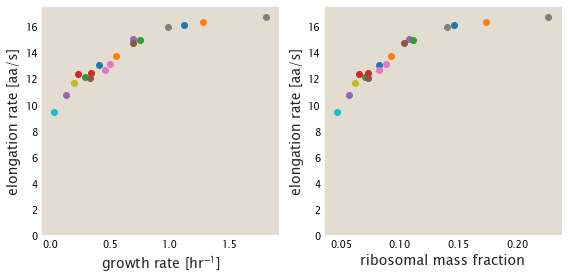

In [208]:

color_dict = dict(zip(np.append(dai_Cm_df.condition.unique(), dai_nut_df.condition.unique()), palette))

fig, ax = plt.subplots(1, 2, figsize = (8,4))
    
for cond, d in dai_nut_df.groupby('condition'):
    ax[0].scatter(d['growth_rate_hr'], d['Translational elongation rate (aa/s)'], zorder = 10)
    ax[1].scatter(d['RNA_P_ratio']/2.1, d['Translational elongation rate (aa/s)'], zorder = 10)
    #,
#               color =  color_dict[cond])
    
ax[0].set_ylim(0,17.5)
ax[0].set_xlabel('growth rate [hr$^{-1}$]', fontsize = 14)
ax[0].set_ylabel('elongation rate [aa/s]', fontsize = 14)

ax[1].set_ylim(0,17.5)
ax[1].set_xlabel('ribosomal mass fraction', fontsize = 14)
ax[1].set_ylabel('elongation rate [aa/s]', fontsize = 14)
plt.tight_layout()

I'm going to need to be able to estimate cell volume

In [312]:
dai_nut_df.head()

,condition,Cm (μM),RNA_P_ratio,growth_rate_hr,Translational elongation rate (aa/s),measured_prot_frac,f_a,type,Naa,R,R2,V
0,RDM + 0.2% glucose+10 mM NH4Cl,0.0,0.476,1.80,16.7,NaN,0.958,nutrient limitation,3.505599e+09,106529.351729,NaN,3.449298
1,0. 2 % glucose+cAA+10 mM NH4Cl,0.0,0.364,1.28,16.3,NaN,0.900,nutrient limitation,2.116852e+09,49191.725509,NaN,2.011341
2,10 mM glucose-6-phosphate+10 mM gluconate +10...,0.0,0.306,1.12,16.1,NaN,0.927,nutrient limitation,1.903160e+09,37178.933217,NaN,1.703767
3,0.2% glucose+10 mM NH4Cl,0.0,0.294,0.98,15.9,11.6,0.865,nutrient limitation,1.576870e+09,29596.703738,24522.983097,1.473480
4,0.2% xylose+10 mM NH4Cl,0.0,0.233,0.75,14.9,NaN,0.902,nutrient limitation,1.353128e+09,20127.737984,NaN,1.160743


(1000, 100000000.0)

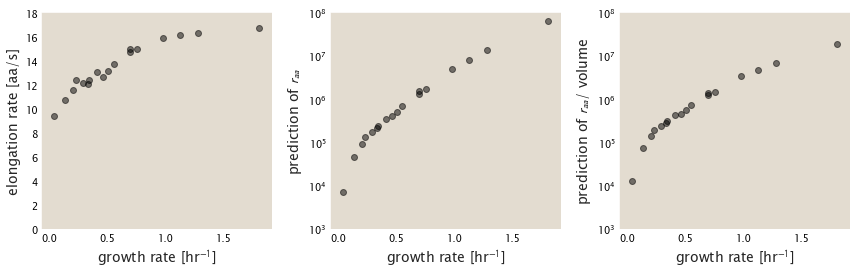

In [406]:
df_raa_est = pd.DataFrame()

fig, ax = plt.subplots(1, 3, figsize = (12,4))

for gr, d in dai_nut_df.groupby(['growth_rate_hr', 'condition']):
    r_aa = np.logspace(-1,10, 1000)
    rt = compute_elongation_rate(r_aa, d['R'].values[0], Kd=1, V=d['V'].values[0]*1E-15, #Kd=1E-5
                                 t=60*60*(np.log(2)/d['growth_rate_hr'].values[0]), #t=d['growth_rate_hr'].values[0], 
                        Na=6.022E23, fa=d['f_a'].values[0], rt_max=17.1)
    
    rt_compare = list( np.abs(rt - d['Translational elongation rate (aa/s)'].values[0]))

    minpos = rt_compare.index(min(rt_compare))
    
    df_raa_est_list = {'condition' :  gr[1],
                      'growth_rate_hr' : gr[0],
                      'raa_bestfit' : r_aa[minpos],
                      'rt' : d['Translational elongation rate (aa/s)'].values[0],
                      'f_a' : d['f_a'].values[0],
                      'rt_fit' : rt[minpos],
                      'V' : d['V'].values[0],
                      'R' : d['R'].values[0], 
                      'Naa' : d['Naa'].values[0], 
                      'Phi_R' : d['Phi_R'].values[0]}
    df_raa_est = df_raa_est.append(df_raa_est_list,
                                  ignore_index = True)
    
    ax[0].scatter(gr[0], rt[minpos], zorder=10,
               color = 'k', alpha = 0.5)
    
    ax[1].scatter(gr[0], r_aa[minpos], zorder=10,
               color = 'k', alpha = 0.5)
    
    ax[2].scatter(gr[0], r_aa[minpos]/d['V'], zorder=10,
               color = 'k', alpha = 0.5)
    
ax[0].set_ylim(0,18)
ax[0].set_xlabel('growth rate [hr$^{-1}$]', fontsize = 14)
ax[0].set_ylabel('elongation rate [aa/s]', fontsize = 14)

# ax[1].set_ylim(0,18)
ax[1].set_xlabel('growth rate [hr$^{-1}$]', fontsize = 14)
ax[1].set_ylabel('prediction of $r_{aa}$', fontsize = 14)

# ax[1].set_ylim(0,18)
ax[2].set_xlabel('growth rate [hr$^{-1}$]', fontsize = 14)
ax[2].set_ylabel('prediction of $r_{aa}$/ volume', fontsize = 14)


plt.tight_layout()
ax[1].set_yscale('log')
ax[1].set_ylim(1000,1E8)

plt.tight_layout()
ax[2].set_yscale('log')
ax[2].set_ylim(1000,1E8)


In [407]:
df_raa_est

,Naa,Phi_R,R,V,condition,f_a,growth_rate_hr,raa_bestfit,rt,rt_fit
0,1.309966e+08,0.046190,811.207621,0.552903,0.2% glycerol+20 mM Threonine,0.168,0.035,6.995920e+03,9.4,9.409194
1,3.751193e+08,0.056190,2825.865738,0.610160,20 mM glutamate+10 mM NH4Cl,0.441,0.130,4.567301e+04,10.7,10.736048
2,5.028199e+08,0.061905,4173.072293,0.656791,0.2% glycerol +10 mM Arginine,0.554,0.201,9.288979e+04,11.6,11.544284
3,5.498540e+08,0.065238,4809.146931,0.676848,20 mM aspartate+10 mM NH4Cl,0.590,0.230,1.324714e+05,12.3,12.341995
4,6.723107e+08,0.070000,6309.391405,0.720310,0.075% mannose+10 mM NH4Cl,0.683,0.290,1.750827e+05,12.1,12.124233
5,7.717742e+08,0.072381,7489.174617,0.750824,20 mM potassium aspartate,0.756,0.330,2.090838e+05,12.0,12.009942
6,7.736797e+08,0.072381,7507.665116,0.758652,0.1% mannose+10 mM NH4Cl,0.751,0.340,2.314005e+05,12.4,12.348483
7,8.300258e+08,0.081905,9114.233135,0.815785,0.2% mannose+10 mM NH4Cl,0.756,0.410,3.471687e+05,13.0,13.018548
8,1.009919e+09,0.081905,11089.576614,0.859210,60 mM acetate+10 mM NH4Cl,0.879,0.460,3.940902e+05,12.6,12.646056
9,1.024628e+09,0.087619,12036.059110,0.895608,0.2% galactose+10 mM NH4Cl,0.860,0.500,4.951020e+05,13.1,13.143876


In [327]:
# fig, ax = plt.subplots(1, 1)#, figsize = (8,4))

# for r_aa in np.logspace(3,9, 10):
#     rt = compute_elongation_rate(r_aa, dai_nut_df['R'].values, Kd=Kd, V=dai_nut_df['V'].values*1E-15, 
#                                  t=dai_nut_df['growth_rate_hr'].values, 
#                         Na=6.022E23, fa=dai_nut_df['f_a'].values, rt_max=17.1)
    
#     ax.plot(dai_nut_df['growth_rate_hr'], rt, zorder=10,
#               ls = '--', color = 'k', alpha = 0.5)
    
# ax.set_ylim(0,17.5)
# ax.set_xlabel('growth rate [hr$^{-1}$]', fontsize = 14)
# ax.set_ylabel('elongation rate [aa/s]', fontsize = 14)

In [195]:
color_dict

{'20 mM potassium aspartate': '#7AA974',
 'NQ1261(ΔptsG) in 0.2% glucose +10 mM NH4Cl': '#BFD598',
 'RDM+0.2% glucose +10 mM NH4Cl': '#EAC264',
 '60 mM acetate +10 mM NH4Cl': '#F3DAA9',
 '0.2% fructose +10 mM NH4Cl': '#738FC1',
 '0.2% glucose +10 mM NH4Cl': '#A9BFE3',
 'RDM + 0.2% glucose+10 mM NH4Cl': '#D56C55',
 '0. 2 % glucose+cAA+10 mM NH4Cl': '#E8B19D',
 ' 10 mM glucose-6-phosphate+10 mM gluconate +10 mM NH4Cl': '#AB85AC',
 '0.2% glucose+10 mM NH4Cl': '#D4C2D9',
 '0.2% xylose+10 mM NH4Cl': '#7E9D90',
 '0.2 % glycerol+10 mM NH4Cl': '#905426'}

## Cm dosages

Now  lets use the estimated r_aa values to make predictions about the change in elongation rate as chlor is added to the media.

In [399]:
dai_Cm_df = pd.DataFrame({'condition' : ['20 mM potassium aspartate' for i in np.arange(3)],
          'Cm (μM)' : [0, 2, 4],
          'growth_rate_hr' : [0.33, 0.24, 0.17],
          'Translational elongation rate (aa/s)' : [12.0 , 15.3, 15.8],
     'f_a' : [0.756, 0.282, 0.158],
     'RNA_P_ratio' : [0.152, 0.231, 0.292],
    'type' : ['antibiotic' for i in np.arange(3)]},
            columns = ['condition', 'Cm (μM)','growth_rate_hr',
                    'Translational elongation rate (aa/s)','f_a',
                       'RNA_P_ratio' , 'type' ])
    

# dai_Cm_df = dai_Cm_df.append(pd.DataFrame({'condition' : ['NQ1261(ΔptsG) in 0.2% glucose +10 mM NH4Cl' for i in np.arange(3)],
#       'Cm (μM)' : [0, 2, 3],
#       'growth_rate_hr' : [0.38, 0.16, 0.092],
#       'Translational elongation rate (aa/s)' : [12.4, 14.3, 15.2],
#  'f_a' : [0.790, 0.211, 0.099],
#  'RNA_P_ratio' : [0.160, 0.218, 0.252],
# 'type' : ['antibiotic' for i in np.arange(3)]},
#         columns = ['condition', 'Cm (μM)','growth_rate_hr',
#                 'Translational elongation rate (aa/s)','f_a',
#                    'RNA_P_ratio' , 'type' ]) )



dai_Cm_df = dai_Cm_df.append(pd.DataFrame({'condition' : ['RDM + 0.2% glucose+10 mM NH4Cl' for i in np.arange(3)],
      'Cm (μM)' : [0, 4, 8],
      'growth_rate_hr' : [1.8, 1.08, 0.57],
      'Translational elongation rate (aa/s)' : [16.7 , 16.8, 17.3],
 'f_a' : [0.958, 0.505, 0.243],
 'RNA_P_ratio' : [0.476, 0.551, 0.621],
'type' : ['antibiotic' for i in np.arange(3)]},
        columns = ['condition', 'Cm (μM)','growth_rate_hr',
                'Translational elongation rate (aa/s)','f_a',
                   'RNA_P_ratio' , 'type' ]) )

dai_Cm_df = dai_Cm_df.append(pd.DataFrame({'condition' : ['60 mM acetate+10 mM NH4Cl' for i in np.arange(3)],
      'Cm (μM)' : [0, 3, 6],
      'growth_rate_hr' : [0.46, 0.25, 0.18],
      'Translational elongation rate (aa/s)' : [12.6  , 14.5, 15.6],
 'f_a' : [0.879, 0.303, 0.170],
 'RNA_P_ratio' : [0.172, 0.246, 0.304],
'type' : ['antibiotic' for i in np.arange(3)]},
        columns = ['condition', 'Cm (μM)','growth_rate_hr',
                'Translational elongation rate (aa/s)','f_a',
                   'RNA_P_ratio' , 'type' ]) )
    
dai_Cm_df = dai_Cm_df.append(pd.DataFrame({'condition' : ['0.2% fructose+10 mM NH4Cl' for i in np.arange(3)],
      'Cm (μM)' : [0, 4, 8],
      'growth_rate_hr' : [0.69, 0.35, 0.21],
      'Translational elongation rate (aa/s)' : [14.7 , 15.9 , 16.3],
 'f_a' : [0.888, 0.290, 0.124],
 'RNA_P_ratio' : [0.217, 0.323, 0.457],
'type' : ['antibiotic' for i in np.arange(3)]},
        columns = ['condition', 'Cm (μM)','growth_rate_hr',
                'Translational elongation rate (aa/s)','f_a',
                   'RNA_P_ratio' , 'type' ]) )

dai_Cm_df = dai_Cm_df.append(pd.DataFrame({'condition' : ['0.2% glucose+10 mM NH4Cl' for i in np.arange(6)],
      'Cm (μM)' : [0, 2, 4, 6, 8, 9],
      'growth_rate_hr' : [0.98, 0.71, 0.53, 0.41, 0.33, 0.26],
      'Translational elongation rate (aa/s)' : [15.9, 16.0, 16.1, 16.2, 16.5, 16.6],
 'f_a' : [0.865, 0.519, 0.318, 0.222, 0.164, 0.123],
 'RNA_P_ratio' : [0.294, 0.358, 0.440, 0.487, 0.511, 0.569],
'type' : ['antibiotic' for i in np.arange(6)]},
        columns = ['condition', 'Cm (μM)','growth_rate_hr',
                'Translational elongation rate (aa/s)','f_a',
                   'RNA_P_ratio' , 'type' ]) )




dai_Cm_df['Naa'] = [prot.size.lambda2P(l) * 1E-15 * 6.022E23 / 110 for l in dai_Cm_df['growth_rate_hr'].values]
dai_Cm_df['R'] = (dai_Cm_df['RNA_P_ratio']/2.1) * dai_Cm_df['Naa'] / 7459.0 

dai_Cm_df['Phi_R'] = (dai_Cm_df['RNA_P_ratio']/2.1) 

[1.         0.8727491  0.71188475]
[1.         0.91534392 0.80687831 0.74470899 0.71296296 0.63624339]
[1.         0.91202673 0.844098  ]
[1.         0.91571754 0.84965831]
[1.         0.86933798 0.74738676]


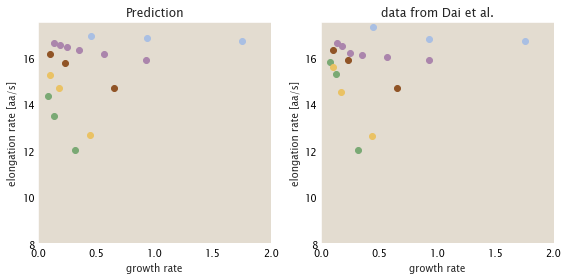

In [410]:

fig, ax = plt.subplots(1, 2, figsize = (8,4))

# # for raa in np.logspace(4,7, 10):
# for raa in np.logspace(3,8, 5):
#     raa_ = raa * np.ones(500)
#     f_a = np.linspace(0.01,1,500)
# #     f_a = np.linspace(0.5,1,500)
    
#     raa_ = raa_*np.arange(0.8,1,500)
#     rt = compute_elongation_rate(raa_, R, Kd=1E-5, V=1.1E-15, t=3564, Na=6.022E23, fa=f_a, rt_max=17.1) #Kd=5E-3
#     ax.plot(R*f_a, rt, zorder=10,
#               ls = '--', color = 'k', alpha = 0.5)

    


# for cond, d in dai_Cm_df[dai_Cm_df.condition == '60 mM acetate+10 mM NH4Cl'].groupby(['condition', 'Cm (μM)']):
# for cond, d in dai_Cm_df.groupby(['condition', 'Cm (μM)']):
for cond, d in dai_Cm_df.groupby('condition'):
#     print(cond)
    df_raa_est_ = df_raa_est[df_raa_est.condition == cond]
    sec_M =  0.5 - df_raa_est_['Phi_R'].values
    sec_M_new = 0.5 - d['Phi_R'].values
    M_reduced = sec_M_new/sec_M
    
    print(M_reduced)
#     f_a = np.linspace(0.01,1,500)
    
    
    
    rt = compute_elongation_rate(df_raa_est_.raa_bestfit.values[0]*M_reduced, 
                                 df_raa_est_.R.values[0], 
                                 Kd=1,#Kd, 
                                 V=df_raa_est_.V.values[0]*1E-15, 
                                 t=60*60*(np.log(2)/d['growth_rate_hr'].values), 
                                 Na=6.022E23, fa=d['f_a'].values, rt_max=17.1) 
    
    gr = compute_growth_rate(rt, df_raa_est_.Naa.values[0], df_raa_est_.R.values[0], fa=d['f_a'].values)
#     print(rt, gr)
    ax[0].scatter(gr, rt, zorder=10,
               color =  color_dict[cond])
    ax[0].set_title('Prediction')
#               color = 'k', alpha = 0.5)
    ax[1].scatter(gr, d['Translational elongation rate (aa/s)'], zorder = 10,
              color =  color_dict[cond])
    ax[1].set_title('data from Dai et al.')
for  _ax in ax:  
    _ax.set_ylim(8,17.5)
    _ax.set_xlim(0,2)
    _ax.set_xlabel('growth rate')
    _ax.set_ylabel('elongation rate [aa/s]')
    
plt.tight_layout()

In [360]:
dai_Cm_df.condition

0         20 mM potassium aspartate
1         20 mM potassium aspartate
2         20 mM potassium aspartate
0    RDM + 0.2% glucose+10 mM NH4Cl
1    RDM + 0.2% glucose+10 mM NH4Cl
2    RDM + 0.2% glucose+10 mM NH4Cl
0         60 mM acetate+10 mM NH4Cl
1         60 mM acetate+10 mM NH4Cl
2         60 mM acetate+10 mM NH4Cl
0         0.2% fructose+10 mM NH4Cl
1         0.2% fructose+10 mM NH4Cl
2         0.2% fructose+10 mM NH4Cl
0          0.2% glucose+10 mM NH4Cl
1          0.2% glucose+10 mM NH4Cl
2          0.2% glucose+10 mM NH4Cl
3          0.2% glucose+10 mM NH4Cl
4          0.2% glucose+10 mM NH4Cl
5          0.2% glucose+10 mM NH4Cl
Name: condition, dtype: object

Text(0, 0.5, 'elongation rate [aa/s]')

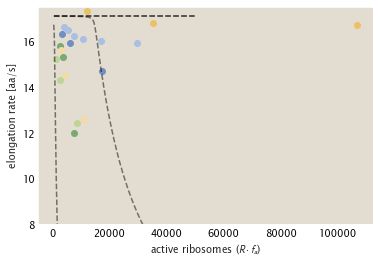

In [184]:

# rt_max = 17.1
# Kd = 15*((rt_max/ 11.5 ) - 1)*1E-1 #mM
R = 120000
R = 50000

fig, ax = plt.subplots(1, 1)

# for raa in np.logspace(4,7, 10):
for raa in np.logspace(3,8, 5):
    raa_ = raa * np.ones(500)
    f_a = np.linspace(0.01,1,500)
#     f_a = np.linspace(0.5,1,500)
    
    raa_ = raa_*np.arange(0.8,1,500)
    rt = compute_elongation_rate(raa_, R, Kd=Kd, V=1.1E-15, t=3564, Na=6.022E23, fa=f_a, rt_max=17.1) #Kd=5E-3
    ax.plot(R*f_a, rt, zorder=10,
              ls = '--', color = 'k', alpha = 0.5)

    


for cond, d in dai_Cm_df.groupby(['condition', 'Cm (μM)']):
    ax.scatter(d['R']*d['f_a'], d['Translational elongation rate (aa/s)'], zorder = 10,
              color =  color_dict[cond[0]])
    
plt.ylim(8,17.5)
# plt.xlim(0,12000)
plt.xlabel('active ribosomes ($R \cdot f_a$)')
plt.ylabel('elongation rate [aa/s]')

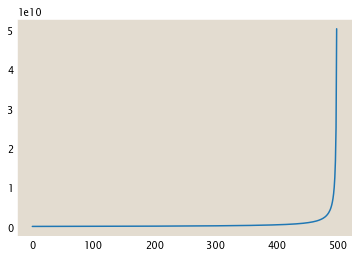

In [158]:
plt.plot(raa_[::-1])

In [136]:
prot.size.lambda2size(0.7)

1.1020780632587706

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


Text(0, 0.5, 'elongation rate [aa/s]')

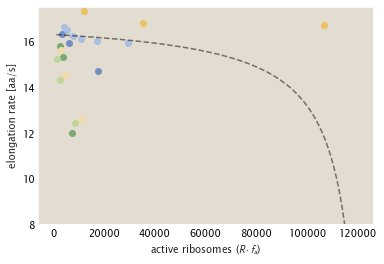

In [81]:

# rt_max = 17.1
Kd = 15*((rt_max/ 11.5 ) - 1)*1E-1 #mM

# # R = 8400 # ribosomes per cell
R = 120000
# # ribo_frac = 0.12
# ribo_frac = 0.1


fig, ax = plt.subplots(1, 1)

f_a = np.linspace(0.01,1,500)
# rt = compute_elongation_rate(10000000, R, Kd=5E-3, V=1E-15, t=1, Na=6.022E23, fa=f_a, rt_max=17.1) #Kd=5E-3
rt = 17.1/(1 + 5E-3/(100E-3 - 100E-3*f_a))

ax.plot(R*f_a, rt, zorder=10,
              ls = '--', color = 'k', alpha = 0.5)

    


for cond, d in dai_Cm_df.groupby(['condition', 'Cm (μM)']):
    ax.scatter(d['R']*d['f_a'], d['Translational elongation rate (aa/s)'], zorder = 10,
              color =  color_dict[cond[0]])
    
plt.ylim(8,17.5)
# plt.xlim(0,12000)
plt.xlabel('active ribosomes ($R \cdot f_a$)')
plt.ylabel('elongation rate [aa/s]')

In [82]:
Kd

0.7304347826086959